# Cian flats EDA

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# USE THIS STYLE
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
# 
# OR THIS STYLE
import aquarel

theme = aquarel.load_theme("arctic_light")
theme.set_font(family="serif")
theme.apply()

# Сделаем автоподгрузку всех изменений при перепрогонке ячейки
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [29]:
custom_pallete = {
    "red": "#BF616A",
    "orange": "#D08770",
    "yellow": "#EBCB8B",
    "green": "#A3BE8C",
    "purple": "#B48EAD",
    "light_green": "#8FBCBB",
    "light_gray_blue": "#88C0D0",
    "light_blue": "#81A1C1",
    "blue": "#5E81AC",
}

## Load data

In [3]:
df_cian = pd.read_csv("./data/cian_houses.csv")
df_cian.head()

,price,location,metro,floor,floor_count,square,living_square,kitchen_square,year,finish_type,ceiling_height,view,accomodation_type,url
0,25107300,"Москва, ЦАО, р-н Пресненский, Шелепихинское ш.",Шелепиха,18,51,45.90,16.4,unknown,2024,Без отделки,3.1,На улицу,Новостройка,https://www.cian.ru/sale/flat/306796067/
1,130000000,"Москва, ЦАО, р-н Хамовники, ул. Усачева, 15А",Спортивная,9,14,110.00,45.0,20.0,2022,Без ремонта,unknown,На улицу,Вторичка,https://www.cian.ru/sale/flat/304330115/
2,310361512,"Москва, ЗАО, р-н Очаково-Матвеевское, Нежинска...",Давыдково,26,31,246.70,140.9,28.0,2008,Дизайнерский,3.1,unknown,Вторичка,https://www.cian.ru/sale/flat/301450189/
3,23676000,"Москва, СВАО, р-н Марьина роща, Тэйт жилой ком...",Марьина Роща,5,49,59.19,24.2,unknown,2027,Предчистовая,3.12,unknown,Новостройка,https://www.cian.ru/sale/flat/296640150/
4,131000000,"Москва, ЦАО, р-н Пресненский, Лаки жилой квартал",Улица 1905 года,6,21,114.00,40.9,35.0,unknown,Дизайнерский,unknown,unknown,Вторичка,https://www.cian.ru/sale/flat/304330219/


We can drop urls

In [5]:
df_cian = df_cian.drop(columns=["url"])
df_cian.head()

,price,location,metro,floor,floor_count,square,living_square,kitchen_square,year,finish_type,ceiling_height,view,accomodation_type
0,25107300,"Москва, ЦАО, р-н Пресненский, Шелепихинское ш.",Шелепиха,18,51,45.90,16.4,unknown,2024,Без отделки,3.1,На улицу,Новостройка
1,130000000,"Москва, ЦАО, р-н Хамовники, ул. Усачева, 15А",Спортивная,9,14,110.00,45.0,20.0,2022,Без ремонта,unknown,На улицу,Вторичка
2,310361512,"Москва, ЗАО, р-н Очаково-Матвеевское, Нежинска...",Давыдково,26,31,246.70,140.9,28.0,2008,Дизайнерский,3.1,unknown,Вторичка
3,23676000,"Москва, СВАО, р-н Марьина роща, Тэйт жилой ком...",Марьина Роща,5,49,59.19,24.2,unknown,2027,Предчистовая,3.12,unknown,Новостройка
4,131000000,"Москва, ЦАО, р-н Пресненский, Лаки жилой квартал",Улица 1905 года,6,21,114.00,40.9,35.0,unknown,Дизайнерский,unknown,unknown,Вторичка


Выберем численные и категориальные переменные в датасете

In [32]:
numerical_features = [f for f in df_cian.columns if df_cian.dtypes[f] != 'object']
categorical_features = [f for f in df_cian.columns if df_cian.dtypes[f] == 'object']

In [33]:
numerical_features

['price', 'floor', 'floor_count', 'square']

<Axes: >

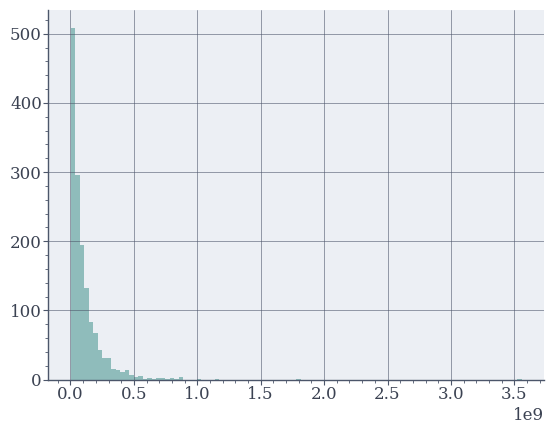

In [27]:
df_cian["price"].hist(
    bins=100
)

<Axes: >

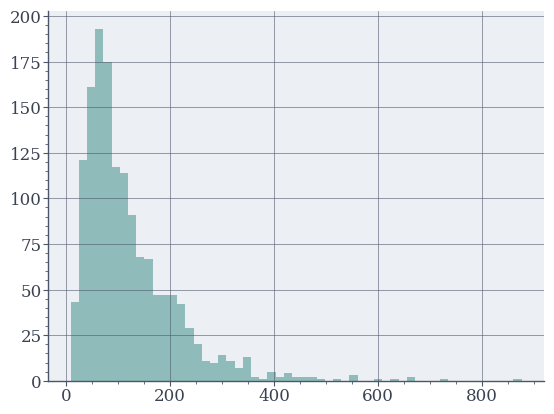

In [28]:
df_cian["square"].hist(
    bins=55
)